# Tarea 2

*Integrantes:* 
* Fuentes Fuentes Adrián 
* Olivares Hernández Francisco Javier
* Ramírez Montes Jonathan Natael 
* Sánchez Romero Paulina Michelle

### TAREA:

**1.-** Hacer un modelo regresión logistica con woes con la tabla que generaron en la tarea 1.

**2.-** Hacer un árbol de clasificación con la misma tabla que el problema 1. No olviden que tienen que hacer el ajuste de hiperparámetros.

**3.-** Seleccionar con validación cruzada cuál es el mejor modelo de los dos problemas anteriores.

**4.-** Obtener los puntos óptimos de decisión para el modelo seleccionado.

En todos los casos obtener: Gini, KS, ROC en entrenamiento y validación.


In [179]:
#!pip install optbinning

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from pylab import*
import datetime as dt
import seaborn as sns
from optbinning import OptimalBinning


In [4]:
#Corremos el ejercicio 1 de la tarea anterior.
%run ../Tarea_1./Tarea1_ej1.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id_              50000 non-null  int64         
 1   _id2_             50000 non-null  int64         
 2   comp_mixto1       50000 non-null  float64       
 3   inversion         50000 non-null  float64       
 4   fecha_inicio      50000 non-null  datetime64[ns]
 5   comp_interno1     50000 non-null  float64       
 6   comp_interno2     50000 non-null  object        
 7   comp_interno3     50000 non-null  float64       
 8   comp_interno4     50000 non-null  float64       
 9   categoria1        50000 non-null  float64       
 10  categoria2        50000 non-null  float64       
 11  categoria3        50000 non-null  float64       
 12  comp_externo1     47831 non-null  float64       
 13  comp_externo2     44410 non-null  float64       
 14  comp_externo3     4999

<ipython-input-4-0d46a4e85529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['porc_inv'] = final['inversion'] / tot_inv


# EJERCICIO 1

In [5]:
#Creamos una copia de la tabla final_1 del ejercicio 1 de la tarea anterior.
copy_final_1 = final_1.copy()
copy_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             50000 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        50000 non-null  float64       
 3   porc_inv         50000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [6]:
#Creamos una nueva tabla sin datos faltantes en las fechas.
datos1 = copy_final_1.dropna()
datos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             49352 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        49352 non-null  float64       
 3   porc_inv         49352 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [7]:
#Creamos una condición que nos permita filtrar a los clientes que son aptos para recibir el crédito.
mask = ((datos1['porc_inv'] > np.percentile(datos1['porc_inv'], 90)) | (mini & maxi ) )

In [8]:
#Creamos un indicador para marcar a los clientes aptos para el crédito y los que no.
datos1['target'] = 0 #No aptos.
datos1.loc[mask,'target'] = 1 #Aptos.

<ipython-input-8-79800bf3224b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['target'] = 0 #No aptos.
C:\Users\p0s05ap\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
#Las fechas las separamos de tal forma que el día, el mes y el año estén cada uno en una columna separada.
datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
datos1['Day'] = datos1['mes_informacion'].dt.day #Día.

<ipython-input-9-e01fcf106195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
<ipython-input-9-e01fcf106195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
<ipython-input-9-e01fcf106195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
#Creamos la tabla que utilizaremos para los algoritmos que incluyen los cambios antes mencionados.
rdy_table = datos1[['_id_','Year','Month','Day','inversion','porc_inv','target']]
rdy_table.head()

,_id_,Year,Month,Day,inversion,porc_inv,target
0,78213,2021,5,1,0.000000,0.000000e+00,0
1,76457,2021,5,1,0.041039,1.258548e-08,0
2,40666,2019,5,1,0.000000,0.000000e+00,0
3,8329,2021,5,1,0.000000,0.000000e+00,0
4,68389,2021,5,1,77.422135,2.374342e-05,0


In [11]:
#Hacemos validación y test
X = rdy_table.copy()
y = X.pop('target')

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [93]:
X_test

,_id_,Year,Month,Day,inversion,porc_inv
44800,85558,2021,5,1,32.917281,0.000010
4078,35092,2021,5,1,0.000000,0.000000
24442,34484,2021,5,1,0.000000,0.000000
15067,65130,2021,5,1,39.873547,0.000012
46915,5526,2021,5,1,0.000000,0.000000
...,...,...,...,...,...,...
49640,21627,2021,5,1,0.000000,0.000000
17631,94864,2021,5,1,0.000000,0.000000
32727,25519,2021,5,1,0.000000,0.000000
3331,77959,2021,5,1,0.000000,0.000000


In [12]:
optb_year  = OptimalBinning(name = "Year", dtype = "numerical", solver = "cp")
optb_month = OptimalBinning(name = "Month", dtype = "numerical", solver = "cp")
optb_day   = OptimalBinning(name = "Day", dtype = "numerical", solver = "cp")
optb_inv   = OptimalBinning(name = "inversion", dtype = "numerical", solver = "cp")

columns = ['Year', 'Month', 'Day', 'inversion']
opts    = [optb_year, optb_month, optb_day, optb_inv]

## Para el entrenamiento

In [13]:
optb_year.fit(X_train["Year"].values, y_train)
optb_month.fit(X_train["Month"].values, y_train)
optb_day.fit(X_train["Day"].values, y_train)
optb_inv.fit(X_train["inversion"].values, y_train)

OptimalBinning(name='inversion')

In [14]:
for i in opts:
    display(f"{i}:", i.splits)

"OptimalBinning(name='Year'):"

array([2019.5, 2020.5])

"OptimalBinning(name='Month'):"

array([4.5, 5.5])

"OptimalBinning(name='Day'):"

array([], dtype=float64)

"OptimalBinning(name='inversion'):"

array([], dtype=float64)

In [15]:
year_table  = optb_year.binning_table
month_table = optb_month.binning_table
day_table   = optb_day.binning_table
inv_table   = optb_inv.binning_table

In [16]:
display(year_table.build())
display(month_table.build())
display(day_table.build())
display(inv_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2019.50)",3704,0.093817,3226,478,0.129050,-0.284212,0.008485,0.001057
1,"[2019.50, 2020.50)",2735,0.069274,2421,314,0.114808,-0.151056,0.001679,0.000210
2,"[2020.50, inf)",33042,0.836909,29873,3169,0.095908,0.04994,0.002046,0.000256
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,39481,1.000000,35520,3961,0.100327,,0.012210,0.001522


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.50)",2925,0.074086,2582,343,0.117265,-0.17501,0.002433,0.000304
1,"[4.50, 5.50)",32151,0.814341,29054,3097,0.096327,0.045123,0.001628,0.000204
2,"[5.50, inf)",4405,0.111573,3884,521,0.118275,-0.184729,0.004098,0.000512
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,39481,1.000000,35520,3961,0.100327,,0.008160,0.001019


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",39481,1.0,35520,3961,0.100327,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,39481,1.0,35520,3961,0.100327,,0.0,0.0


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",39481,1.0,35520,3961,0.100327,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,39481,1.0,35520,3961,0.100327,,0.0,0.0


<Figure size 432x288 with 0 Axes>

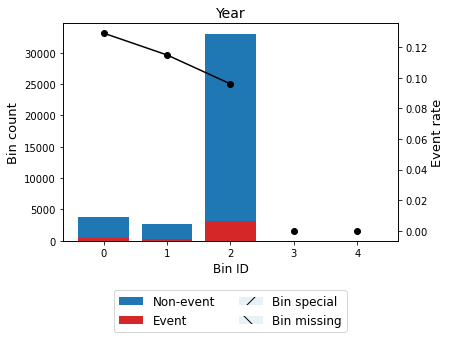

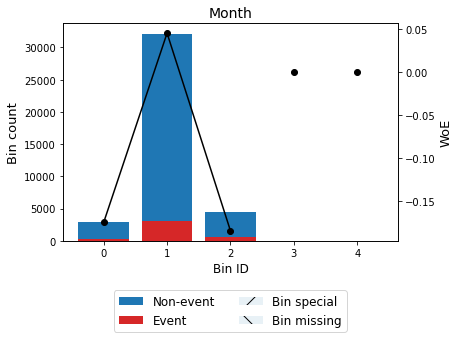

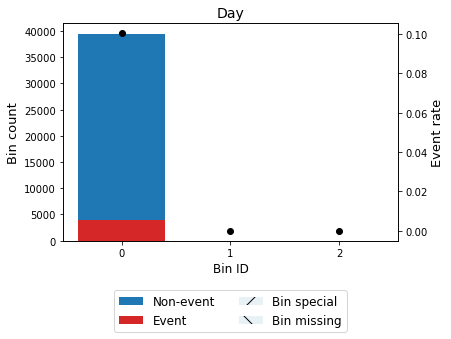

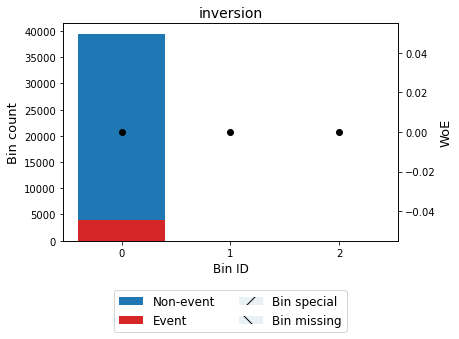

In [17]:
plt.figure()
year_table.plot(metric="event_rate")
month_table.plot(metric="woe")
day_table.plot(metric="event_rate")
inv_table.plot(metric="woe")

<Figure size 432x288 with 0 Axes>

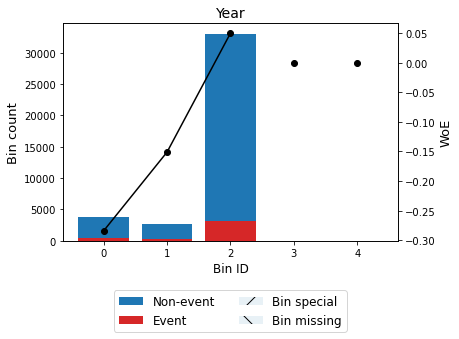

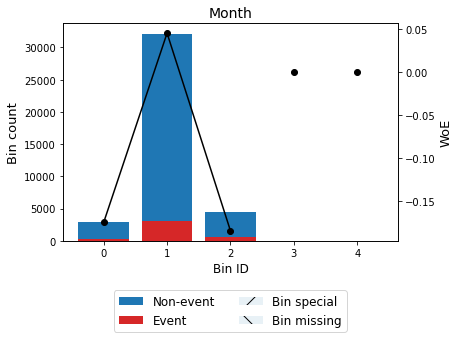

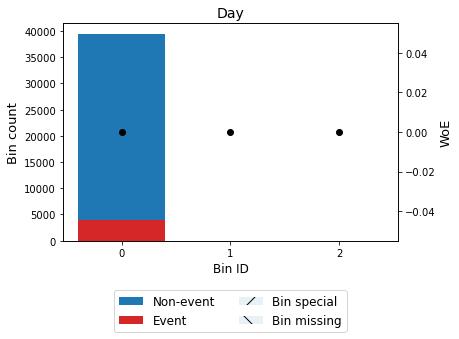

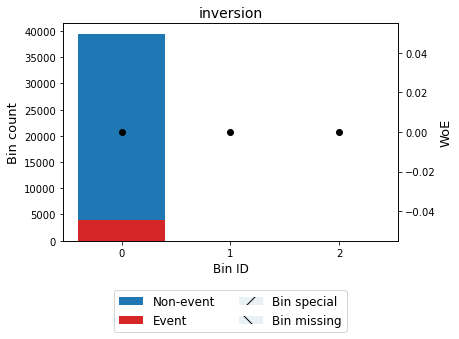

In [18]:
plt.figure()
year_table.plot(metric="woe")
month_table.plot(metric="woe")
day_table.plot(metric="woe")
inv_table.plot(metric="woe")

In [19]:
#Transformamos las variables a woe
X_train["woe_year"]  = optb_year.transform(X_train["Year"], metric="woe")
X_train["woe_month"] = optb_month.transform(X_train["Month"], metric="woe")
X_train["woe_day"]   = optb_day.transform(X_train["Day"], metric="woe")
X_train["woe_inv"]   = optb_inv.transform(X_train["inversion"], metric="woe")

<ipython-input-19-c159af73fad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["woe_year"]  = optb_year.transform(X_train["Year"], metric="woe")
<ipython-input-19-c159af73fad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["woe_month"] = optb_month.transform(X_train["Month"], metric="woe")
<ipython-input-19-c159af73fad1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [20]:
X_train.head()

,_id_,Year,Month,Day,inversion,porc_inv,woe_year,woe_month,woe_day,woe_inv
28246,87955,2021,5,1,0.000000,0.000000,0.049940,0.045123,0.0,0.0
29102,35265,2021,5,1,0.000000,0.000000,0.049940,0.045123,0.0,0.0
4018,59236,2021,5,1,10.885834,0.000003,0.049940,0.045123,0.0,0.0
17026,20847,2018,11,1,0.000000,0.000000,-0.284212,-0.184729,0.0,0.0
31848,47560,2021,5,1,0.000000,0.000000,0.049940,0.045123,0.0,0.0


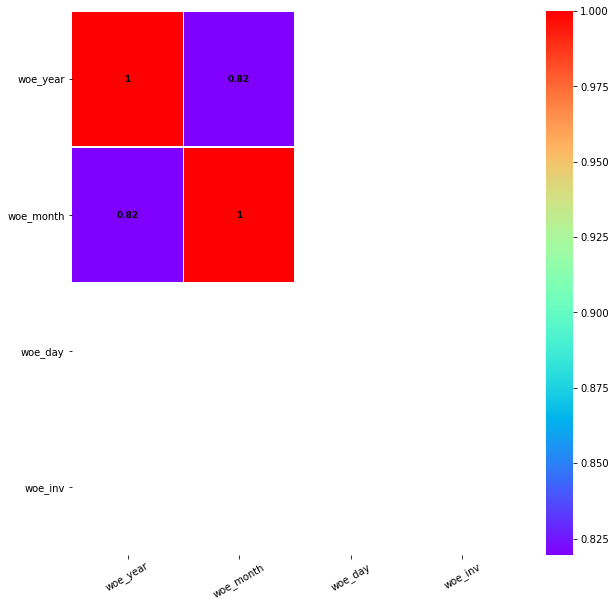

In [21]:
corre = X_train.iloc[ : , 6: ].corr()


xticks = list(corre.index)  
yticks = list(corre.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corre,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,
annot_kws={'size':9,'weight':'bold', 'color':'k'})

ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [22]:
X_woe_train = X_train.iloc[:,6:]
X_woe_train.head()

,woe_year,woe_month,woe_day,woe_inv
28246,0.049940,0.045123,0.0,0.0
29102,0.049940,0.045123,0.0,0.0
4018,0.049940,0.045123,0.0,0.0
17026,-0.284212,-0.184729,0.0,0.0
31848,0.049940,0.045123,0.0,0.0


In [23]:
# Modelo Regresion Logística
model = LogisticRegression()
clf = model.fit(X_woe_train, y_train)

y_pred
 [0 0 0 ... 0 0 0]
y_pred1
 [-2.24278489 -2.24278489 -2.24278489 ... -2.24278489 -2.24278489
 -1.91528551]


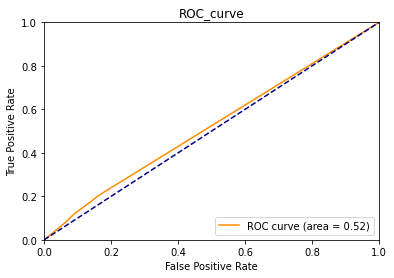

In [24]:
y_pred = clf.predict(X_woe_train)
y_pred1 = clf.decision_function(X_woe_train)
print('y_pred\n', y_pred)
print('y_pred1\n', y_pred1)

#Draw ROC curve and calculate AUC value
fpr, tpr, threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr, tpr)
plot(fpr, tpr, color='darkorange',
         label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

## Conjunto de datos de prueba

In [25]:
X_woe_test = X_test.iloc[:,6:]
X_woe_train.head()

,woe_year,woe_month,woe_day,woe_inv
28246,0.049940,0.045123,0.0,0.0
29102,0.049940,0.045123,0.0,0.0
4018,0.049940,0.045123,0.0,0.0
17026,-0.284212,-0.184729,0.0,0.0
31848,0.049940,0.045123,0.0,0.0


In [26]:
#Transformamos las variables a woe
X_woe_test["woe_year"]  = optb_year.transform(X_test["Year"], metric="woe")
X_woe_test["woe_month"] = optb_month.transform(X_test["Month"], metric="woe")
X_woe_test["woe_day"]   = optb_day.transform(X_test["Day"], metric="woe")
X_woe_test["woe_inv"]   = optb_inv.transform(X_test["inversion"], metric="woe")

y_pred_test
 [0 0 0 ... 0 0 0]
y_pred1_test
 [-2.24278489 -2.24278489 -2.24278489 ... -2.24278489 -2.24278489
 -2.24278489]


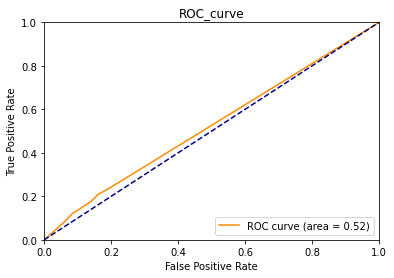

In [27]:
y_pred_test = clf.predict(X_woe_test)
y_pred1_test = clf.decision_function(X_woe_test)
print('y_pred_test\n', y_pred_test)
print('y_pred1_test\n', y_pred1_test)

#Draw ROC curve and calculate AUC value
fpr, tpr, threshold = roc_curve(y_test, y_pred1_test)
roc_auc = auc(fpr, tpr)
plot(fpr, tpr, color='darkorange',
         label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc = "lower right")
plt.show()

In [77]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [181]:
X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test

In [95]:
X = X_train1
X_t = X_test1

In [135]:
X_test = X_t.iloc[:,1:5]
X_train = X.iloc[:,1:5]

In [121]:
num_features = X_train.select_dtypes(include='number').columns.to_list()
num_features

['Year', 'Month', 'Day', 'inversion']

In [122]:
cat_features = X_train.select_dtypes(include='object').columns.to_list()
cat_features

[]

In [123]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [124]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

In [125]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])

In [126]:
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')

In [127]:
reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(solver='liblinear'))])


In [128]:
reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Year', 'Month', 'Day',
                                                   'inversion']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(categories=[],
                                                                                 drop='first',
                                                             

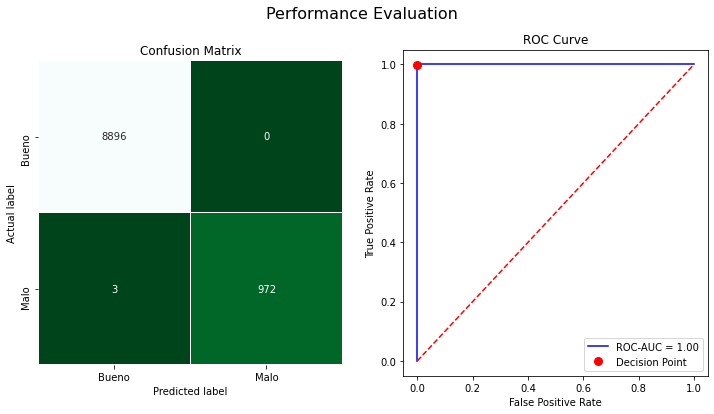

In [137]:
LABELS = ['Bueno', 'Malo']
reg_perf = performance_evaluation_report(reg_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

# EJERCICIO 2

In [183]:
#Creamos una copia de la tabla final_1 del ejercicio 1 de la tarea anterior.
copy_final_1 = final_1.copy()
copy_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             50000 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        50000 non-null  float64       
 3   porc_inv         50000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.9+ MB


In [184]:
#Creamos una nueva tabla sin datos faltantes en las fechas.
datos1 = copy_final_1.dropna()
datos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             49352 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        49352 non-null  float64       
 3   porc_inv         49352 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [185]:
#Creamos una condición que nos permita filtrar a los clientes que son aptos para recibir el crédito.
mask = ((datos1['porc_inv'] > np.percentile(datos1['porc_inv'], 90)) | (mini & maxi ) )

In [186]:
#Creamos un indicador para marcar a los clientes aptos para el crédito y los que no.
datos1['target'] = 0 #No aptos.
datos1.loc[mask,'target'] = 1 #Aptos.

<ipython-input-186-79800bf3224b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['target'] = 0 #No aptos.
C:\Users\p0s05ap\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [187]:
#Las fechas las separamos de tal forma que el día, el mes y el año estén cada uno en una columna separada.
datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
datos1['Day'] = datos1['mes_informacion'].dt.day #Día.

<ipython-input-187-e01fcf106195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
<ipython-input-187-e01fcf106195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
<ipython-input-187-e01fcf106195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [188]:
#Creamos la tabla que utilizaremos para los algoritmos que incluyen los cambios antes mencionados.
rdy_table = datos1[['_id_','Year','Month','Day','inversion','porc_inv','target']]
rdy_table.head()

,_id_,Year,Month,Day,inversion,porc_inv,target
0,78213,2021,5,1,0.000000,0.000000e+00,0
1,76457,2021,5,1,0.041039,1.258548e-08,0
2,40666,2019,5,1,0.000000,0.000000e+00,0
3,8329,2021,5,1,0.000000,0.000000e+00,0
4,68389,2021,5,1,77.422135,2.374342e-05,0


In [189]:
#Creamos una función para obtener el informe de rendimiento de un modelo de clasificación.
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [192]:
t = rdy_table.copy()
del t['_id_']
t.head()

,Year,Month,Day,inversion,porc_inv,target
0,2021,5,1,0.000000,0.000000e+00,0
1,2021,5,1,0.041039,1.258548e-08,0
2,2019,5,1,0.000000,0.000000e+00,0
3,2021,5,1,0.000000,0.000000e+00,0
4,2021,5,1,77.422135,2.374342e-05,0


In [193]:
X = t.copy()
X.pop('porc_inv')
y = X.pop('target')

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y)

In [195]:
num_features = X_train.select_dtypes(include='number').columns.to_list()
num_features

['Year', 'Month', 'Day', 'inversion']

In [196]:
cat_features = X_train.select_dtypes(include='object').columns.to_list()
cat_features

[]

In [197]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [198]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

In [199]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])

In [200]:
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')

In [201]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [202]:
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', dec_tree)])

In [203]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Year', 'Month', 'Day',
                                                   'inversion']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(categories=[],
                                                                                 drop='first',
                                                             

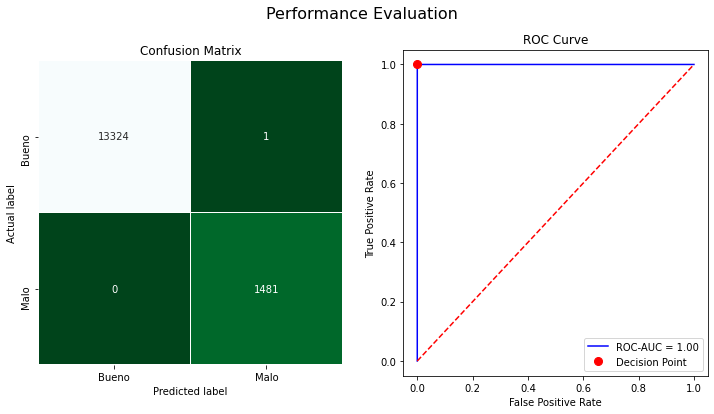

In [204]:
LABELS = ['Bueno', 'Malo']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

In [205]:
from sklearn.base import BaseEstimator, TransformerMixin

In [206]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError('''There are missing values in the array! 
                                Please remove them.''')

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)
        
        self.upper_band_ = mean_vec + self.n_std * std_vec
        self.lower_band_ = mean_vec - self.n_std * std_vec
        self.n_features_ = len(self.upper_band_)
        
        return self 
    
    def transform(self, X, y = None):
        X_copy = pd.DataFrame(X.copy())
        
        upper_band = np.repeat(
            self.upper_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        lower_band = np.repeat(
            self.lower_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        
        X_copy[X_copy >= upper_band] = upper_band
        X_copy[X_copy <= lower_band] = lower_band
        
        return X_copy.values

In [207]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', OutlierRemover())])

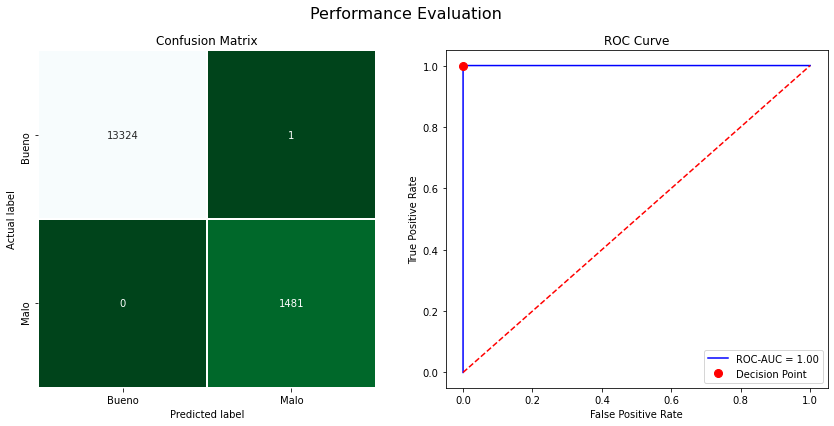

In [208]:
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipeline, num_features),
                                               ('categorical', cat_pipeline, cat_features)],
                                 remainder='drop')

dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', dec_tree)])

tree_pipeline.fit(X_train, y_train)

tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im18.png')
plt.show()

In [209]:
X_train2 = X_train
X_test2 = X_test 
y_train2 = y_train
y_test2 = y_test

# EJERCICIO 3

### Regresión Logistica

In [95]:
X = X_train1
X_t = X_test1
X_test = X_t.iloc[:,1:5]
X_train = X.iloc[:,1:5]

In [28]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [29]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [30]:
#cross_val_score(model, X_train, y_train, cv=k_fold)

array([1.        , 1.        , 1.        , 0.99987335, 0.99987335])

In [138]:
cross_val_score(reg_pipeline, X_train, y_train, cv=k_fold)

array([0.99987337, 0.99974671, 1.        , 0.99987335, 0.99987335])

In [31]:
'''cross_validate(model, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])'''

{'fit_time': array([0.28382707, 0.20514536, 0.20618486, 0.21113276, 0.2263689 ]),
 'score_time': array([0.03236508, 0.0289228 , 0.03091693, 0.02590203, 0.02654386]),
 'test_accuracy': array([1.        , 1.        , 1.        , 0.99987335, 0.99987335]),
 'test_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([1.        , 1.        , 1.        , 0.99873737, 0.99873737]),
 'test_roc_auc': array([1., 1., 1., 1., 1.])}

In [155]:
cross_validate(reg_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.07929897, 0.09275222, 0.10172606, 0.08528399, 0.08776593]),
 'score_time': array([0.02196932, 0.02293825, 0.02293873, 0.01894855, 0.02094364]),
 'test_accuracy': array([0.99987337, 0.99974671, 1.        , 0.99987335, 0.99987335]),
 'test_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.99873897, 0.99747475, 1.        , 0.99873737, 0.99873737]),
 'test_roc_auc': array([1., 1., 1., 1., 1.])}

In [151]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
classifier_gs = GridSearchCV(model, param_grid = grid_values)

In [152]:
classifier_gs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [153]:
classifier_gs.fit(X_train, y_train)

C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_se

C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_se

C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_se

C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\p0s05ap\Anaconda3\lib\site-packages\sklearn\model_se

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [145]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Recall (Training set): 1.0000
Recall (Test set): 0.9979


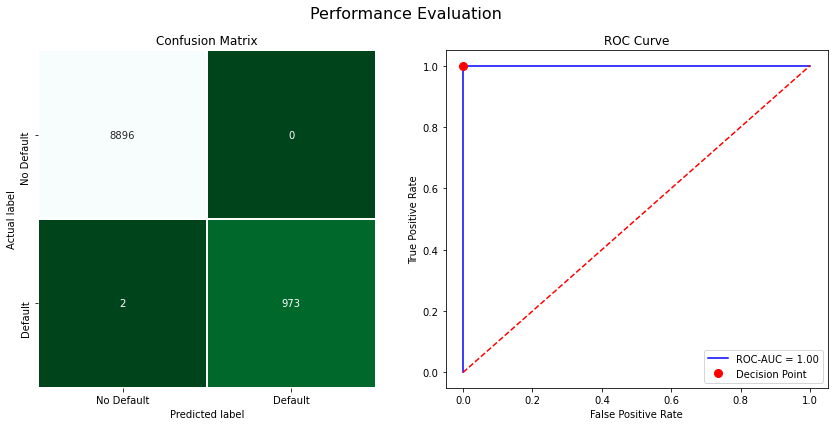

In [146]:
LABELS = ['No Default', 'Default']
reg_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im20.png')
plt.show()

In [147]:
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve,  accuracy_score

In [170]:
train_scores, val_scores, leaves= {}, {}, {}
for max_depth in range(1, 26):
    print(max_depth, end=' ', flush=True)

    reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(solver='liblinear'))])
    train_scores[max_depth], val_scores[max_depth],leaves[max_depth] = [],[], []
    for train_idx, test_idx in k_fold.split(X_train,y_train):
        X_t, y_t,  = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_te, y_te = X_train.iloc[test_idx], y_train.iloc[test_idx]
        reg_pipeline.fit(X_t, y_t)
        train_pred = reg_pipeline.predict_proba(X=X_t)[:, 1]
        train_score = roc_auc_score(y_score=train_pred, y_true=y_t)
        #print(train_score)
        train_scores[max_depth].append(train_score)

        test_pred = reg_pipeline.predict_proba(X=X_te)[:, 1]
        val_score = roc_auc_score(y_score=test_pred, y_true=y_te)
        val_scores[max_depth].append(val_score)  
        #print(val_score)
        leaves[max_depth].append(max_depth)
        #reg_tree.fit(X=X_t, y=y_t)

        
        #train_scores[max_depth].append(train_score)

        #test_pred = reg_tree.predict(X=X_test)
        #val_score = np.sqrt(mean_squared_error(
        #    y_pred=test_pred, y_true=y_test))
        #val_scores[max_depth].append(val_score)
        #leaves[max_depth].append(get_leaves_count(reg_tree))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

In [171]:
clf_train_scores = pd.DataFrame(train_scores)
clf_valid_scores = pd.DataFrame(val_scores)
bd_leaves = pd.DataFrame(leaves)

In [173]:
roc_entrenamiento=[]
for c in clf_train_scores.columns:
    promedio_roc=mean(clf_train_scores[c])
    roc_entrenamiento.append(promedio_roc)
    
roc_validacion=[]
for c in clf_valid_scores.columns:
    promedio_roc=mean(clf_valid_scores[c])
    roc_validacion.append(promedio_roc)

prof=[]
for c in bd_leaves.columns:
    id_=mean(bd_leaves[c])
    prof.append(id_)

In [177]:
roc_entrenamiento

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [178]:
roc_validacion

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

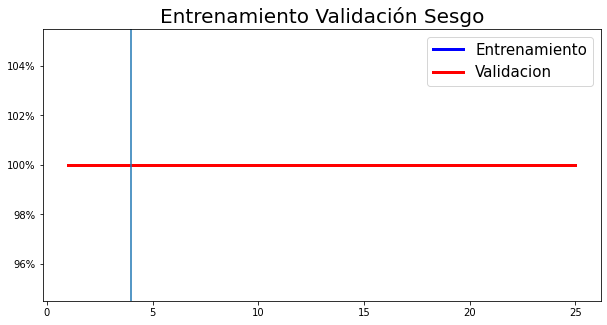

In [176]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Entrenamiento Validación Sesgo",fontsize=20)
ax.plot(prof,roc_entrenamiento,color="blue",linewidth=3,label="Entrenamiento")
ax.plot(prof,roc_validacion,color="red",linewidth=3,label="Validacion")
gca().yaxis.set_major_formatter("{x:,.0%}")
#xticks(fontsize=16)
#yticks(fontsize=16)
axvline(4)
legend(fontsize=15)
show()

### Arbol de Decision

In [219]:
X = X_train2
X_t = X_test2
X_test = X_t
X_train = X

In [220]:
X_test2

,Year,Month,Day,inversion
48915,2021,5,1,221.806243
21872,2021,5,1,38.778623
914,2021,5,1,0.000000
47640,2021,5,1,0.000000
13673,2019,1,1,185.494609
...,...,...,...,...
6572,2021,5,1,0.000000
47890,2021,5,1,204.391424
7473,2021,2,1,0.000000
16341,2021,5,1,0.000000


In [221]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [222]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [223]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([1., 1., 1., 1., 1.])

In [224]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.03590322, 0.03291154, 0.03377008, 0.03191686, 0.03129983]),
 'score_time': array([0.02968001, 0.02631617, 0.02493787, 0.0254581 , 0.02655816]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'test_roc_auc': array([1., 1., 1., 1., 1.])}

In [225]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}

In [226]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)
#print(f'Best parameters: {classifier_gs.best_params_}')
#print(f'Recall (Training set): {classifier_gs.best_score_:.4f}')
#print(f'Recall (Test set): {metrics.recall_score(y_test,classifier_gs.predict(X_test)):.4f}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['Year',
                                                                          'Month',
                                                                          'Day',
                                                                          'inversion']),
        

In [227]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2}
Recall (Training set): 1.0000
Recall (Test set): 1.0000


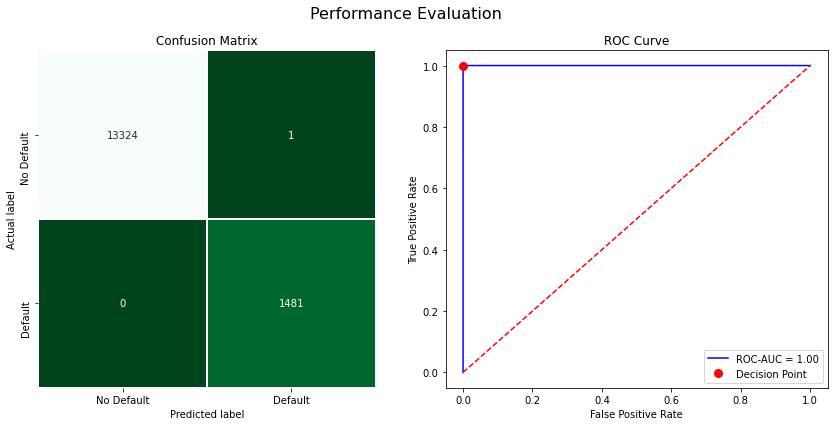

In [228]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im20.png')
plt.show()

In [229]:
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve,  accuracy_score

In [230]:
train_scores, val_scores, leaves = {}, {}, {}
for max_depth in range(1, 26):
    print(max_depth, end=' ', flush=True)
    reg_tree = DecisionTreeClassifier(criterion='gini',
                                          max_depth=max_depth,
                                          min_samples_leaf=10,
                                          random_state=42)
    tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])
    train_scores[max_depth], val_scores[max_depth], leaves[max_depth] = [],[], []
    for train_idx, test_idx in k_fold.split(X_train,y_train):
        X_t, y_t,  = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_te, y_te = X_train.iloc[test_idx], y_train.iloc[test_idx]
        tree_pipeline.fit(X_t, y_t)
        train_pred = tree_pipeline.predict_proba(X=X_t)[:, 1]
        train_score = roc_auc_score(y_score=train_pred, y_true=y_t)
        #print(train_score)
        train_scores[max_depth].append(train_score)

        test_pred = tree_pipeline.predict_proba(X=X_te)[:, 1]
        val_score = roc_auc_score(y_score=test_pred, y_true=y_te)
        val_scores[max_depth].append(val_score)  
        #print(val_score)
        leaves[max_depth].append(max_depth)
        #reg_tree.fit(X=X_t, y=y_t)

        
        #train_scores[max_depth].append(train_score)

        #test_pred = reg_tree.predict(X=X_test)
        #val_score = np.sqrt(mean_squared_error(
        #    y_pred=test_pred, y_true=y_test))
        #val_scores[max_depth].append(val_score)
        #leaves[max_depth].append(get_leaves_count(reg_tree))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

In [231]:
clf_train_scores = pd.DataFrame(train_scores)
clf_valid_scores = pd.DataFrame(val_scores)
bd_leaves = pd.DataFrame(leaves)

In [232]:
leaves

{1: [1, 1, 1, 1, 1],
 2: [2, 2, 2, 2, 2],
 3: [3, 3, 3, 3, 3],
 4: [4, 4, 4, 4, 4],
 5: [5, 5, 5, 5, 5],
 6: [6, 6, 6, 6, 6],
 7: [7, 7, 7, 7, 7],
 8: [8, 8, 8, 8, 8],
 9: [9, 9, 9, 9, 9],
 10: [10, 10, 10, 10, 10],
 11: [11, 11, 11, 11, 11],
 12: [12, 12, 12, 12, 12],
 13: [13, 13, 13, 13, 13],
 14: [14, 14, 14, 14, 14],
 15: [15, 15, 15, 15, 15],
 16: [16, 16, 16, 16, 16],
 17: [17, 17, 17, 17, 17],
 18: [18, 18, 18, 18, 18],
 19: [19, 19, 19, 19, 19],
 20: [20, 20, 20, 20, 20],
 21: [21, 21, 21, 21, 21],
 22: [22, 22, 22, 22, 22],
 23: [23, 23, 23, 23, 23],
 24: [24, 24, 24, 24, 24],
 25: [25, 25, 25, 25, 25]}

In [233]:
clf_train_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [234]:
clf_valid_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [235]:
roc_entrenamiento=[]
for c in clf_train_scores.columns:
    promedio_roc=mean(clf_train_scores[c])
    roc_entrenamiento.append(promedio_roc)
    
roc_validacion=[]
for c in clf_valid_scores.columns:
    promedio_roc=mean(clf_valid_scores[c])
    roc_validacion.append(promedio_roc)

prof=[]
for c in bd_leaves.columns:
    id_=mean(bd_leaves[c])
    prof.append(id_)

In [236]:
roc_entrenamiento

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [237]:
roc_validacion

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

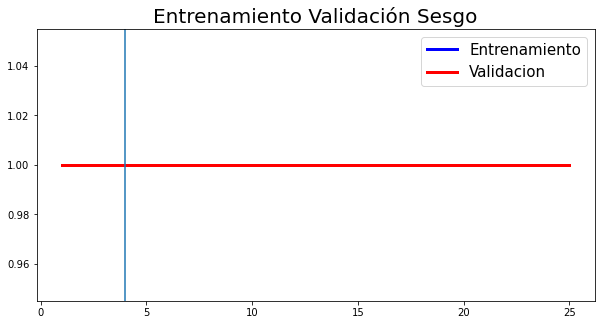

In [239]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Entrenamiento Validación Sesgo",fontsize=20)
ax.plot(prof,roc_entrenamiento,color="blue",linewidth=3,label="Entrenamiento")
ax.plot(prof,roc_validacion,color="red",linewidth=3,label="Validacion")
#gca().yaxis.set_major_formatter("{x:,.0%}")
#xticks(fontsize=16)
#yticks(fontsize=16)
axvline(4)
legend(fontsize=15)
show()

## Decision entre ambos modelos

In [243]:
# REGRESION LOGISTICA
sc_lg = cross_validate(reg_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])['test_accuracy']

print('Accuracy LOGISTIC REGRESSION: %.4f (%.4f)' % (round(np.mean(sc_lg),4), round(np.std(sc_lg),4)))

# ARBOL DE DECISION
sc_dt = cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])['test_accuracy']

print('Accuracy DECISION TREE: %.4f (%.4f)' % (round(np.mean(sc_dt),4), round(np.std(sc_dt),4)))


Accuracy LOGISTIC REGRESSION: 0.9999 (0.0001)
Accuracy DECISION TREE: 1.0000 (0.0000)


#### Al tener un mayor nivel de promedio en el vector de Accuracy, optaremos por el Árbol de Decisión